### 3) Graphing

In [34]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import math
import re
import numpy as np
from itertools import combinations
import seaborn as snsar

In [35]:
Experiment_2_data = pd.read_csv("/work/3) Organized Experiment Data/Experiment 2.csv")
Experiment_1_data = pd.read_csv("/work/3) Organized Experiment Data/Experiment 1.csv")
Experiment_1_2_data = pd.read_csv("/work/3) Organized Experiment Data/Experiment 1 - 2.csv")
Experiment_3_data = pd.read_csv("/work/3) Organized Experiment Data/Experiment 3.csv")

Question_Names_Exp_1 = ["Und_Q", "Und_R", "AI_or_Human", "Confidence"]
Question_Names_Exp_2_3 = ["Und_Q", "Und_R", "Valid", "Trust", "Satis", "Follow", "Action", "Info"]
Response_Source = ["Doctor", "High Accuracy AI", "Low Accuracy AI"]
Random_Labels = ['Doctor', 'AI', 'Doctor + AI']

Experiment 1

In [37]:
palette = ["lightgrey", "darkseagreen", "lightcoral"]

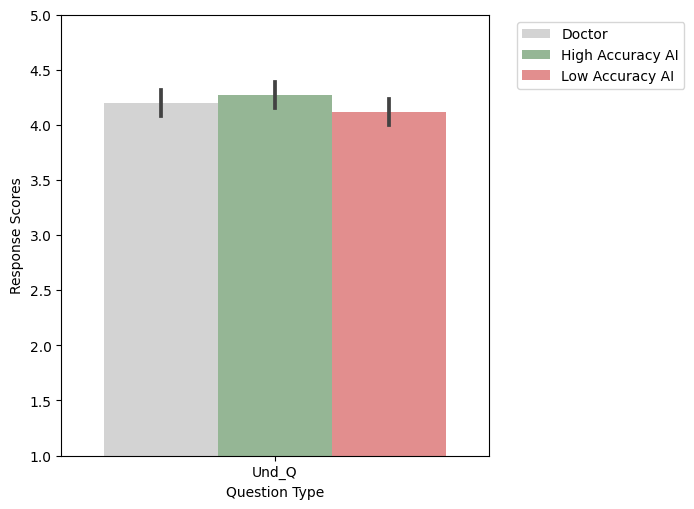

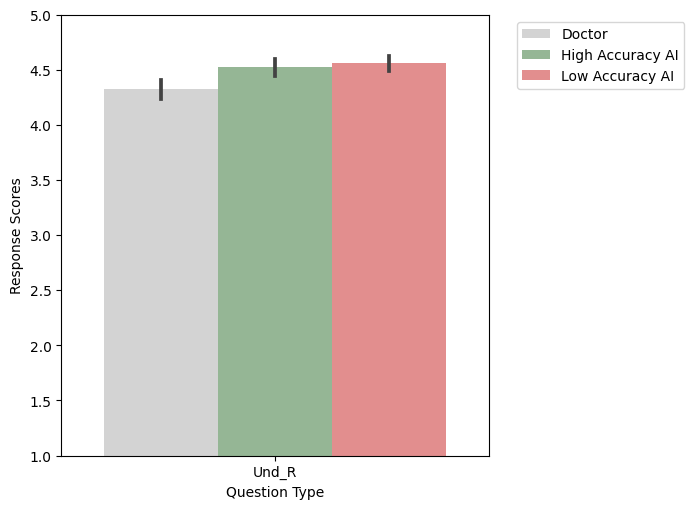

In [39]:
# Understanding Question / Response Graphs

for ques in Question_Names_Exp_1[0:-2]:
    temp_ds = pd.DataFrame()
    temp_ds.insert(0, "Question Type", 0)
    temp_ds.insert(1, "Response Scores", 0)
    temp_ds.insert(2, "Response Source", 0)

    ques_list = list(Experiment_1_data["Question Type"])

    for i in range(len(ques_list)):
        if ques_list[i] == ques:
            temp_ds.loc[len(temp_ds)] = Experiment_1_data.loc[i, :].values.flatten().tolist()[1:4]

    #display(temp_ds)
    plot_params = {
        'x': "Question Type",
        'y' : "Response Scores",
        'hue' : 'Response Source',
        'data' : temp_ds,
        'palette': palette,
        'order' : [ques],
        'hue_order' : ['Doctor', 'High Accuracy AI', 'Low Accuracy AI'],
    }
    fig, ax = plt.subplots(figsize=[5,5])
    plt.tight_layout()
    snsar.barplot(ax=ax, **plot_params)
    ax.set_ylim([1,5])
    ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')


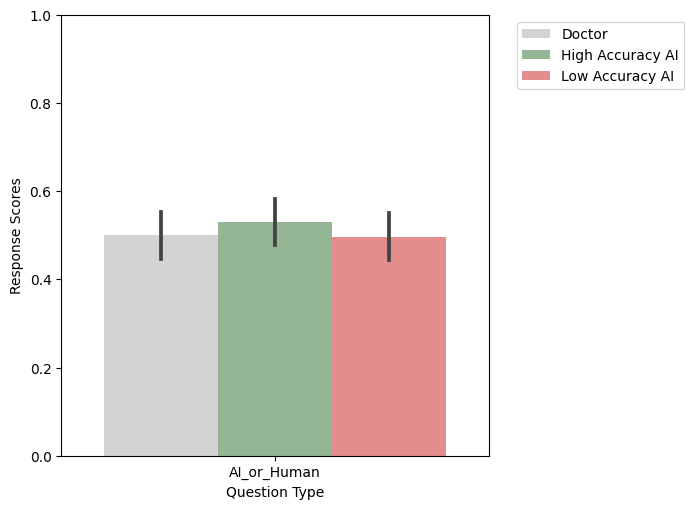

In [41]:
# AI or Human Graphs (Source Determination)

plot_params = {
    'x': "Question Type",
    'y' : "Response Scores",
    'hue' : 'Response Source',
    'data' : Experiment_1_2_data,
    'palette': palette,
    'order' : ["AI_or_Human"],
    'hue_order' : ['Doctor', 'High Accuracy AI', 'Low Accuracy AI'],
}

fig, ax = plt.subplots(figsize=[5,5])
plt.tight_layout()
snsar.barplot(ax=ax, **plot_params)
ax.set_ylim([0,1])
ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')

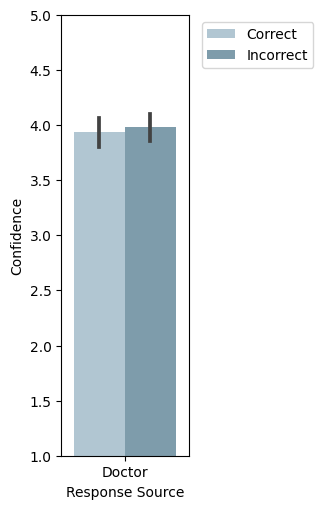

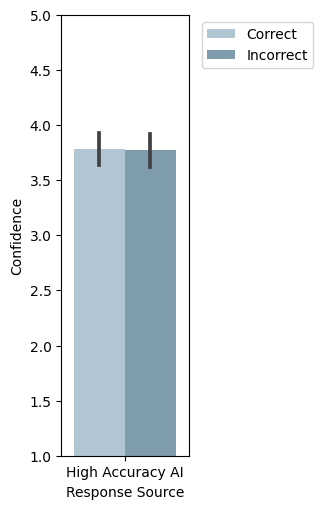

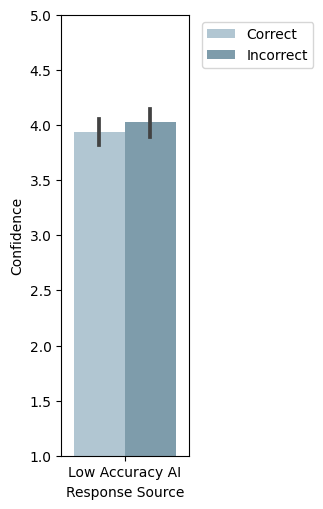

In [43]:
# AI or Human Confidence Graphs

palette_2 = ['#acc8d7', '#779eb2']

for j in range(len(Response_Source)):
    source = Response_Source[j]
    temp_ds = pd.DataFrame()
    temp_ds.insert(0, "Response Source", 0)
    temp_ds.insert(1, "Incorrect/Correct", 0)
    temp_ds.insert(2, "Confidence", 0)

    source_2_list = list(Experiment_1_2_data["Response Source"])

    for i in range(len(source_2_list)):
        if source_2_list[i] == source:
            temp_list = Experiment_1_2_data.loc[i, :].values.flatten().tolist()
            temp_ds.loc[len(temp_ds)] = [temp_list[5], temp_list[2], temp_list[4]]
    
    plot_params = {
        'x': "Response Source",
        'y' : "Confidence",
        'hue' : 'Incorrect/Correct',
        'data' : temp_ds,
        'palette': palette_2,
        'order' : [source],
        'hue_order' : ['Correct', 'Incorrect'],

    }
    fig, ax = plt.subplots(figsize=[2,5])
    plt.tight_layout()
    snsar.barplot(ax=ax, **plot_params)
    ax.set_ylim([1,5])
    ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')

Experiment 2

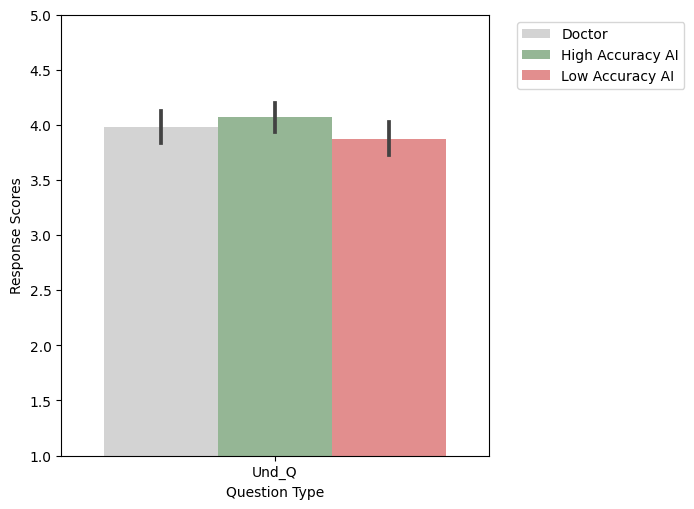

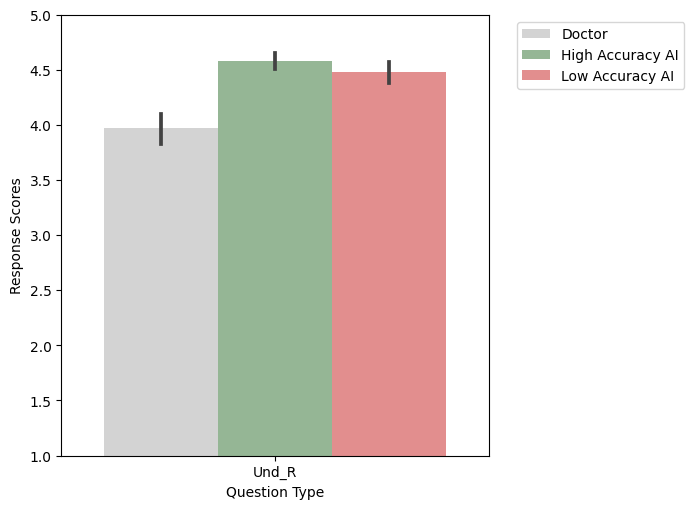

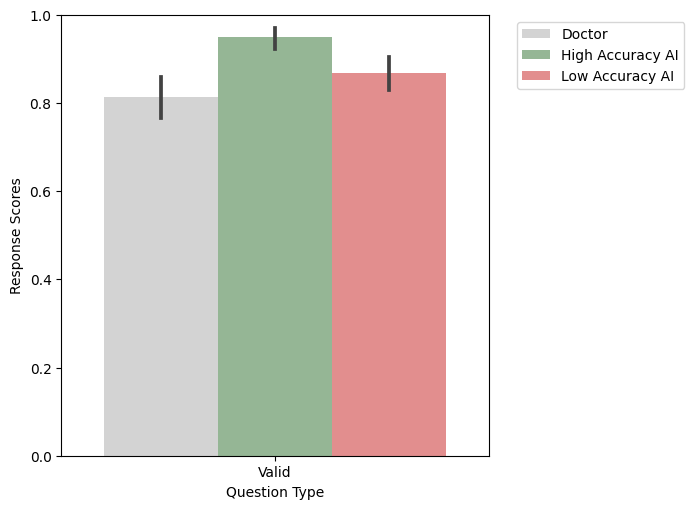

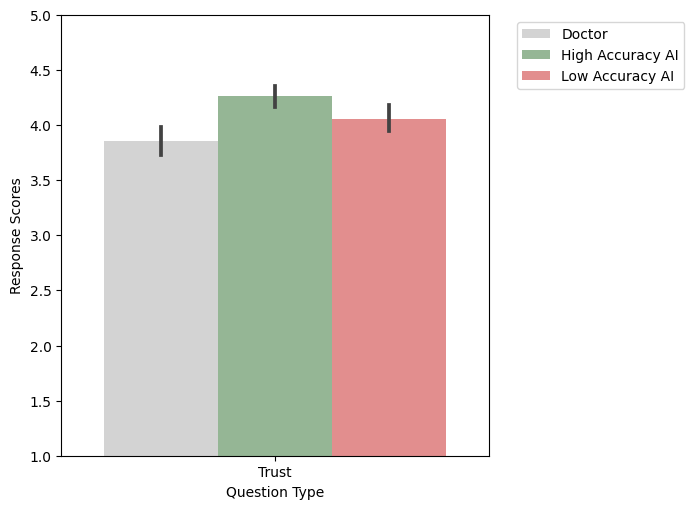

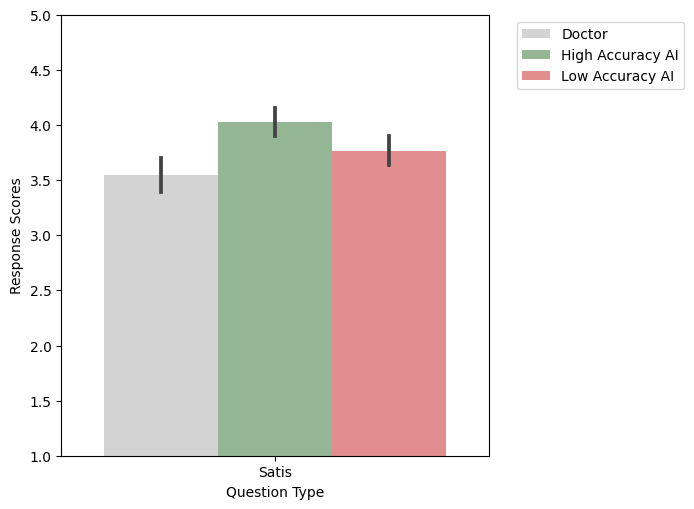

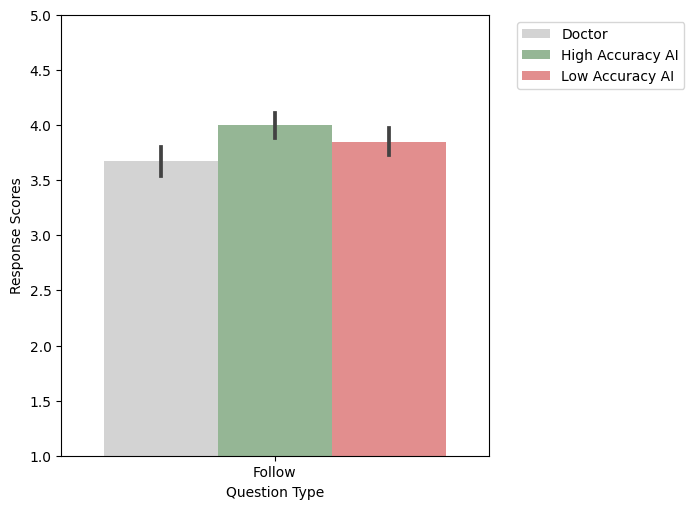

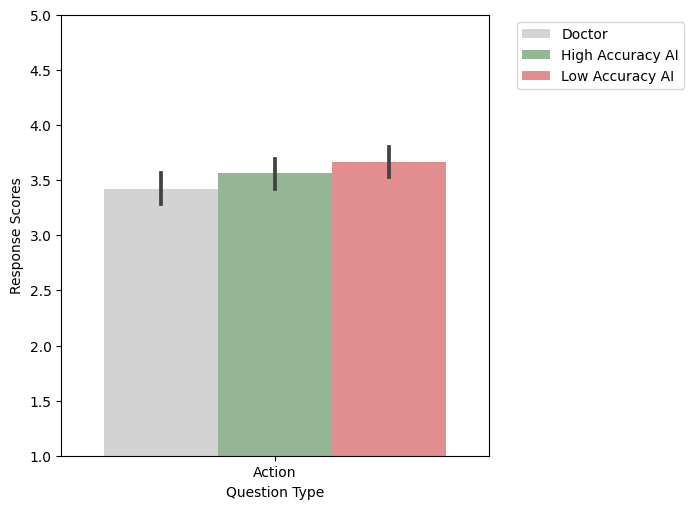

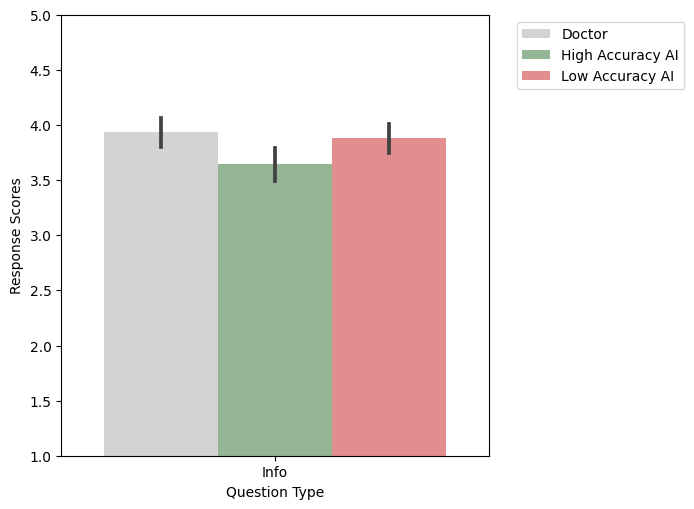

In [38]:
for ques in Question_Names_Exp_2_3:
    temp_ds = pd.DataFrame()
    temp_ds.insert(0, "Question Type", 0)
    temp_ds.insert(1, "Response Scores", 0)
    temp_ds.insert(2, "Response Source", 0)

    ques_list = list(Experiment_2_data["Question Type"])

    for i in range(len(ques_list)):
        if ques_list[i] == ques:
            temp_ds.loc[len(temp_ds)] = Experiment_2_data.loc[i, :].values.flatten().tolist()[1:4]

    if ques != "Valid":
        plot_params = {
            'x': "Question Type",
            'y' : "Response Scores",
            'hue' : 'Response Source',
            'data' : temp_ds,
            'palette': palette,
            'order' : [ques],
            'hue_order' : ['Doctor', 'High Accuracy AI', 'Low Accuracy AI'],
        }
        fig, ax = plt.subplots(figsize=[5,5])
        plt.tight_layout()
        snsar.barplot(ax=ax, **plot_params)
        ax.set_ylim([1,5])
        ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')

    else:
        plot_params = {
            'x': "Question Type",
            'y' : "Response Scores",
            'hue' : 'Response Source',
            'data' : temp_ds,
            'palette': palette,
            'order' : [ques],
            'hue_order' : ['Doctor', 'High Accuracy AI', 'Low Accuracy AI'],
        }
        fig, ax = plt.subplots(figsize=[5,5])
        plt.tight_layout()
        snsar.barplot(ax=ax, **plot_params)
        ax.set_ylim([0,1])
        ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')


Experiment 3

In [ ]:
palette_3_H = ['#dbe8d7', '#b8d1ae', 'darkseagreen']
palette_3_L = ['#ffd6d6', '#ffb3b3', 'lightcoral']
palette_3_D = ['lightgray', 'darkgray', 'dimgray']

palettes_3 = [palette_3_D, palette_3_H, palette_3_L]

/tmp/ipykernel_90/2867592296.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=[5,5])


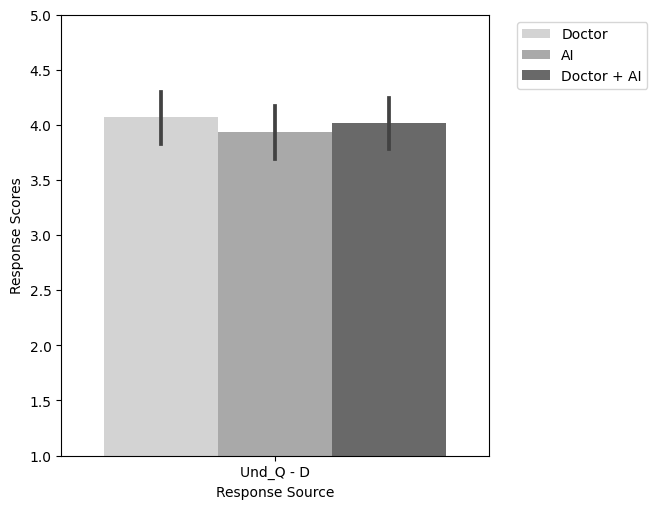

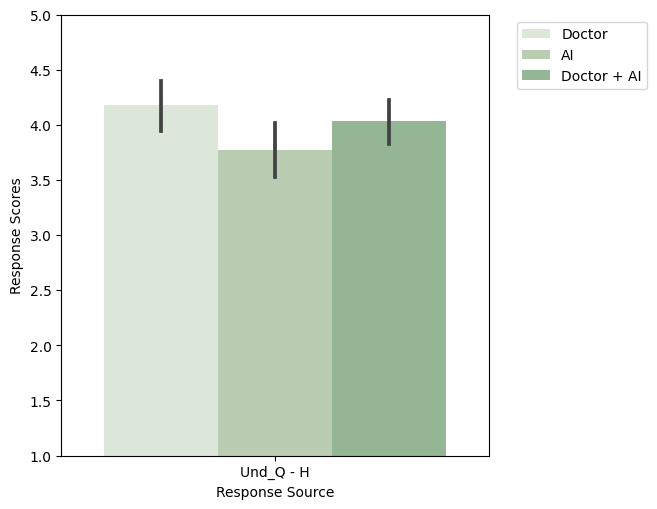

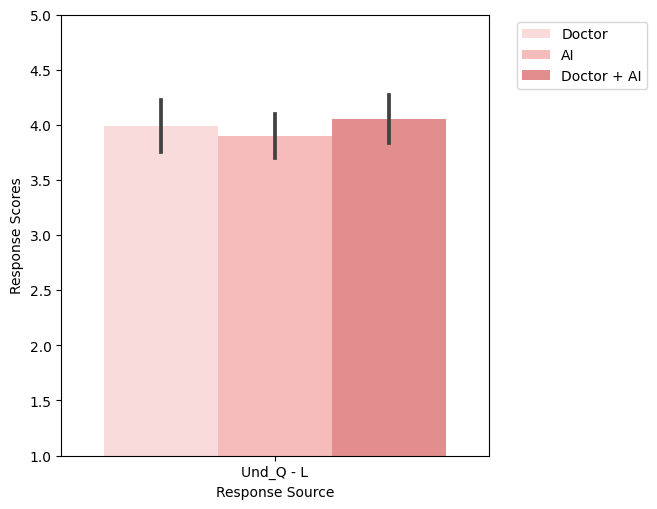

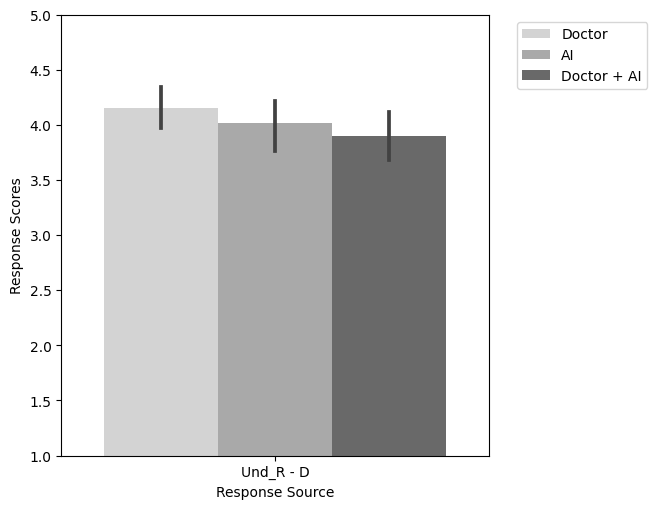

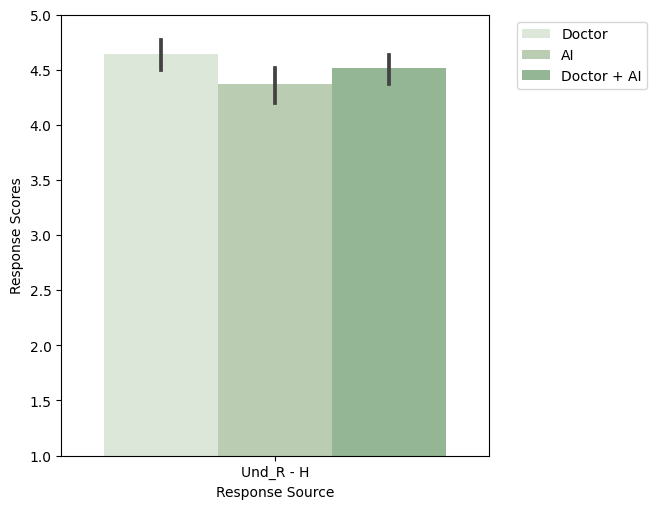

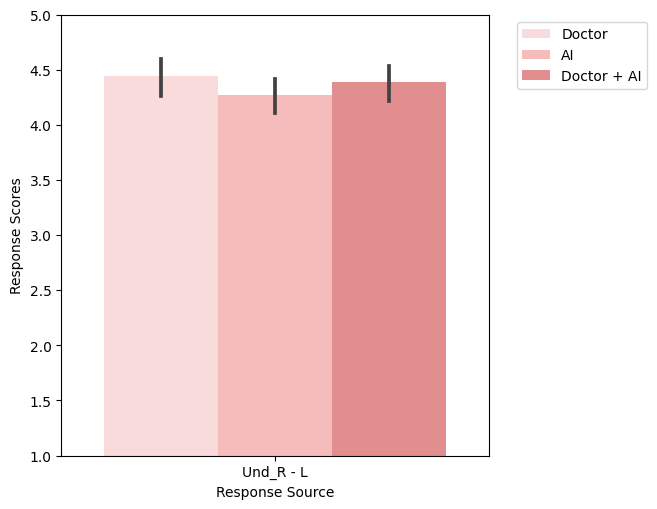

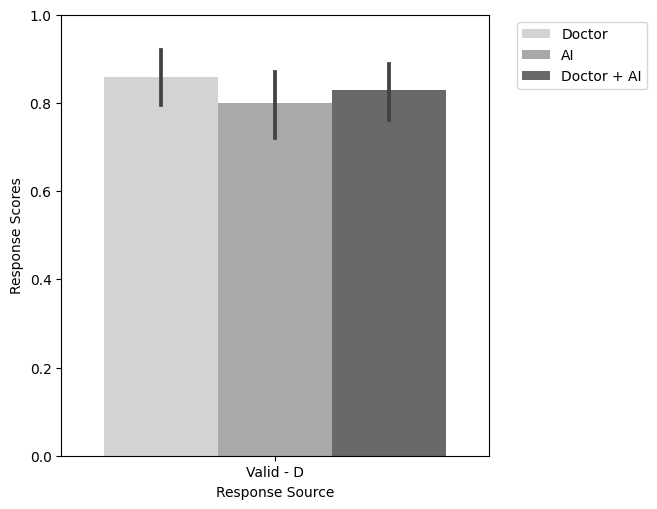

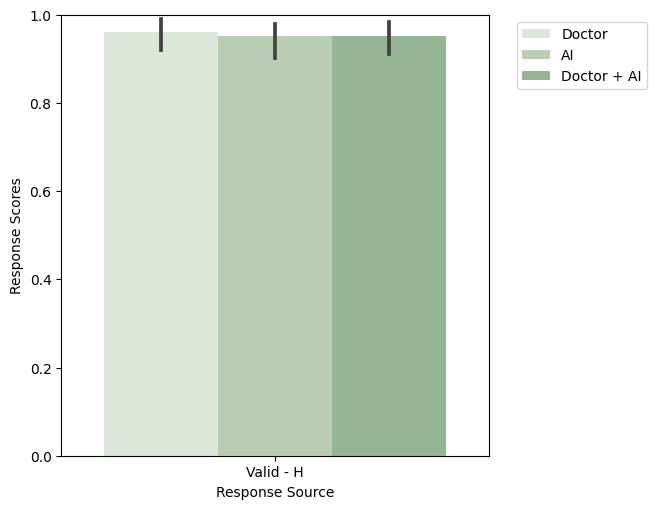

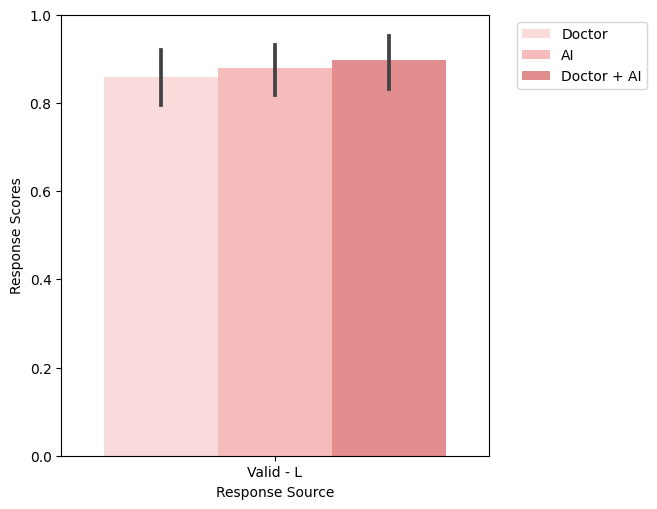

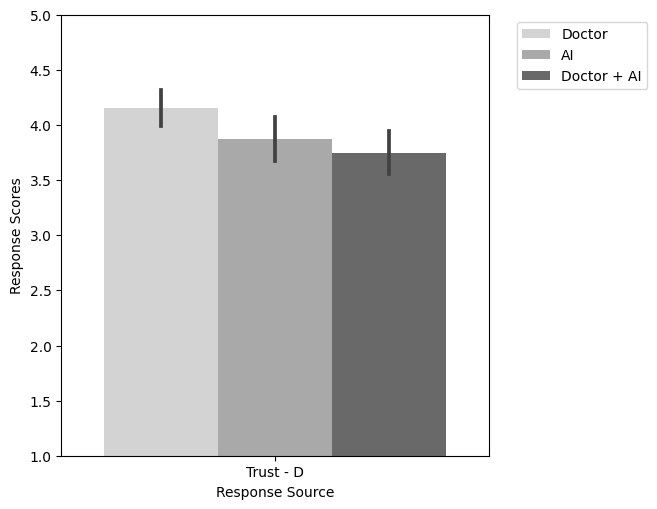

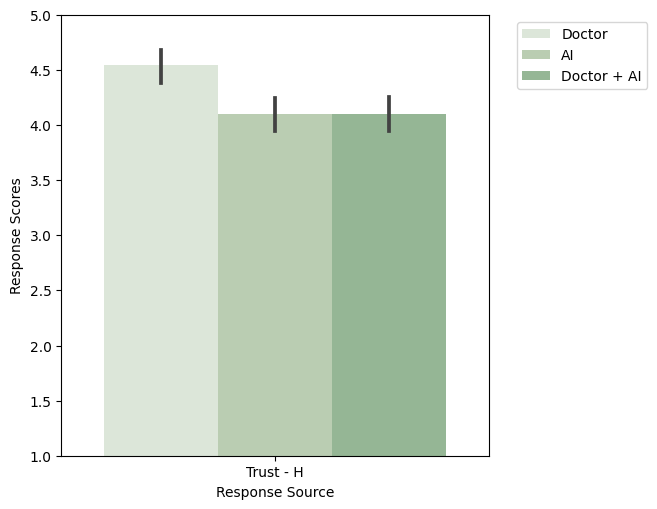

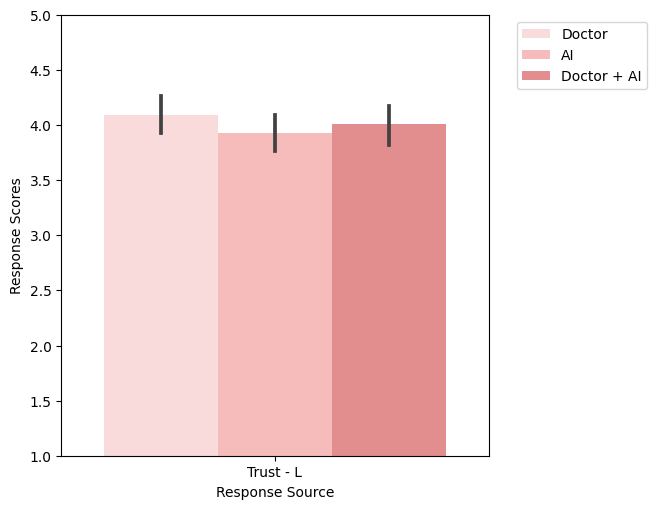

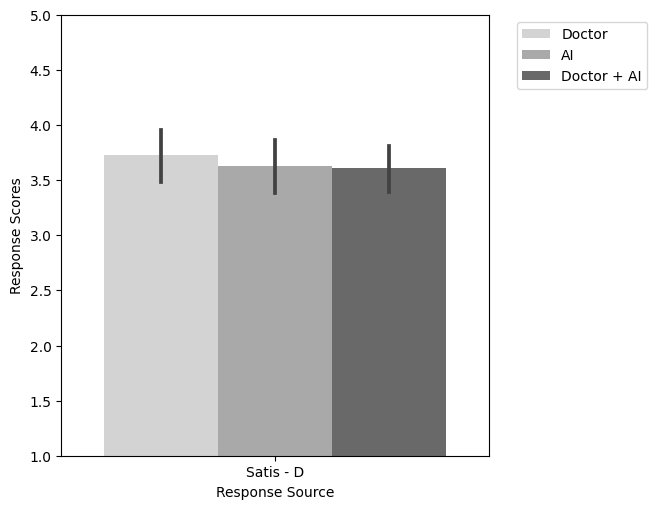

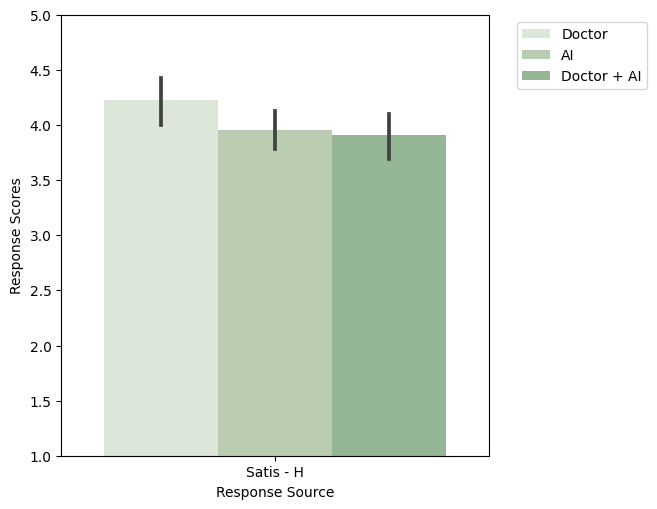

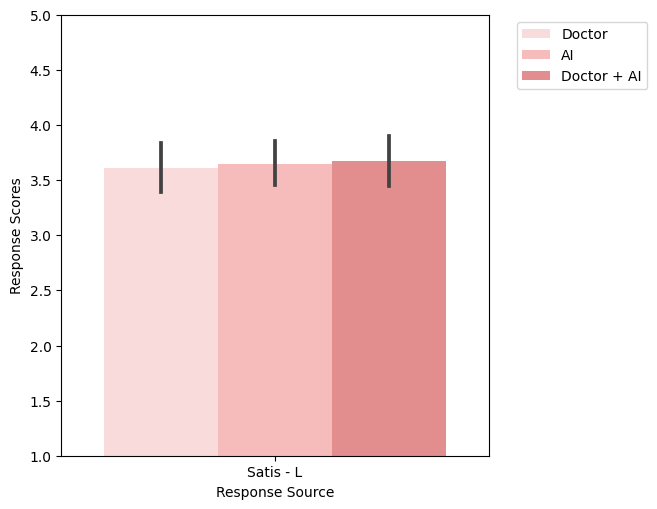

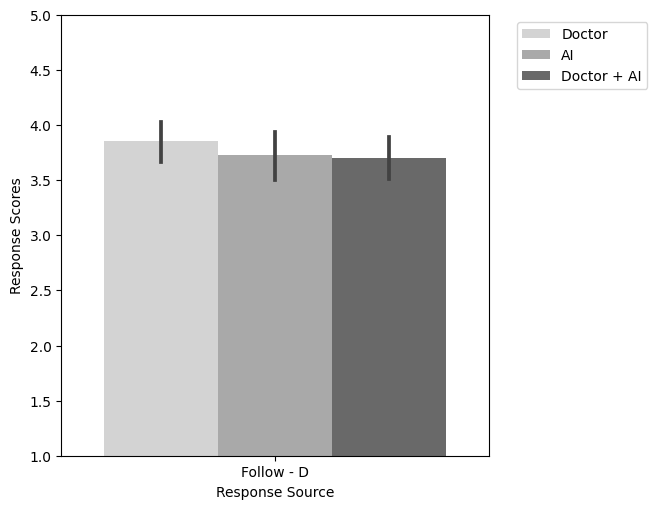

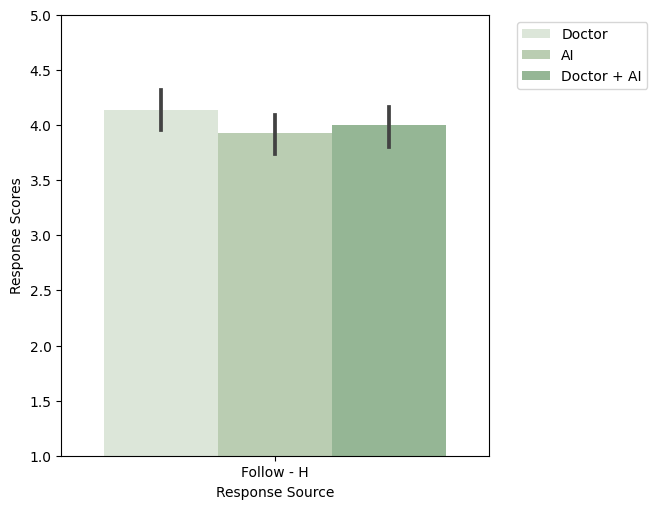

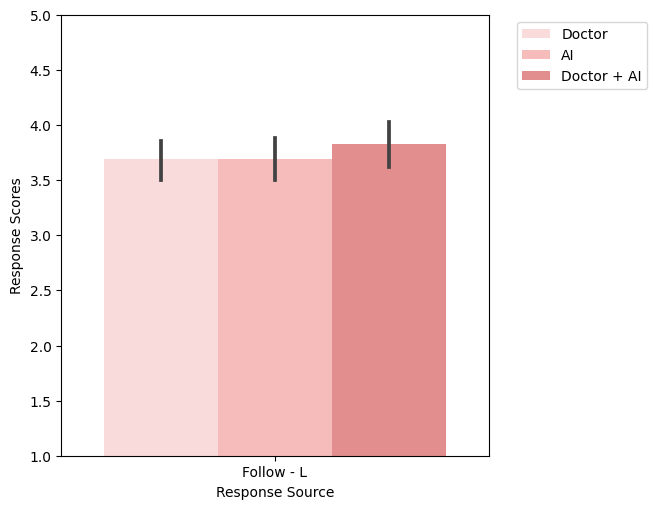

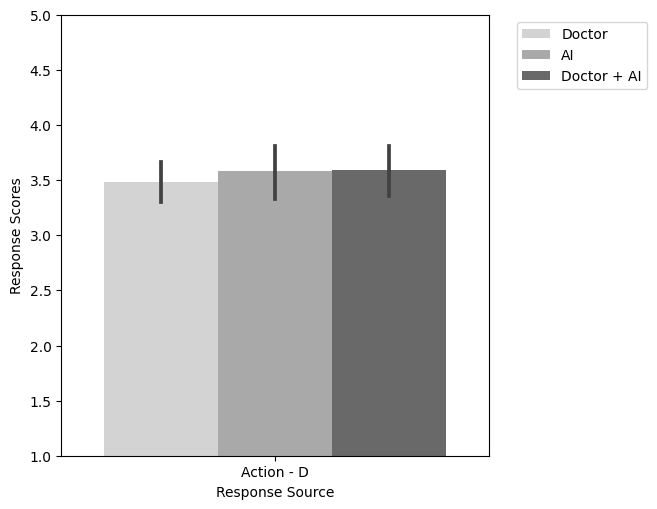

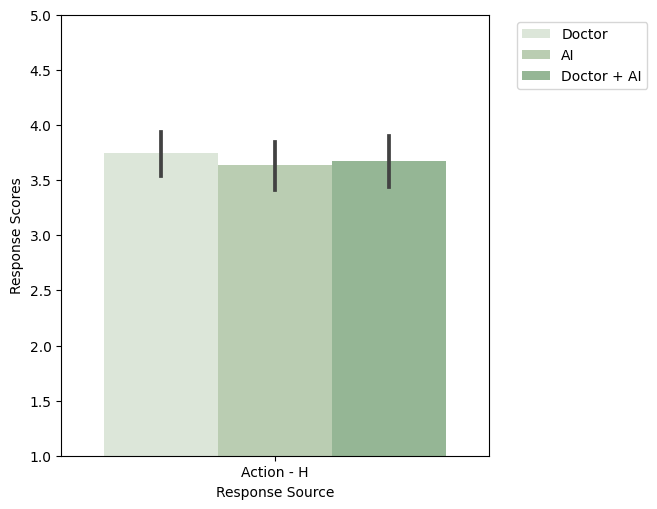

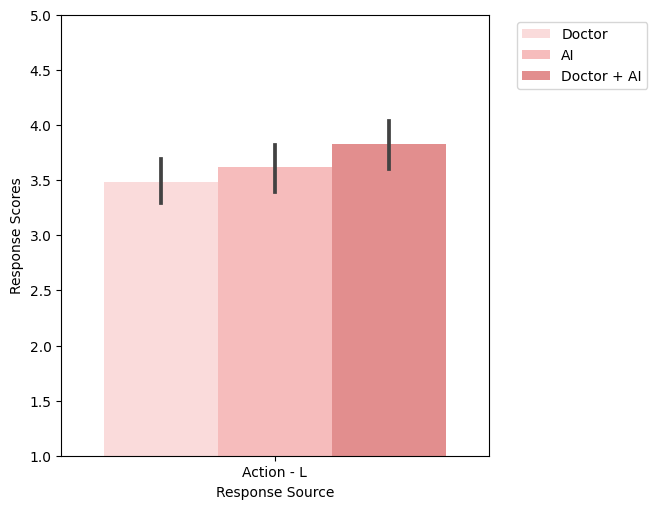

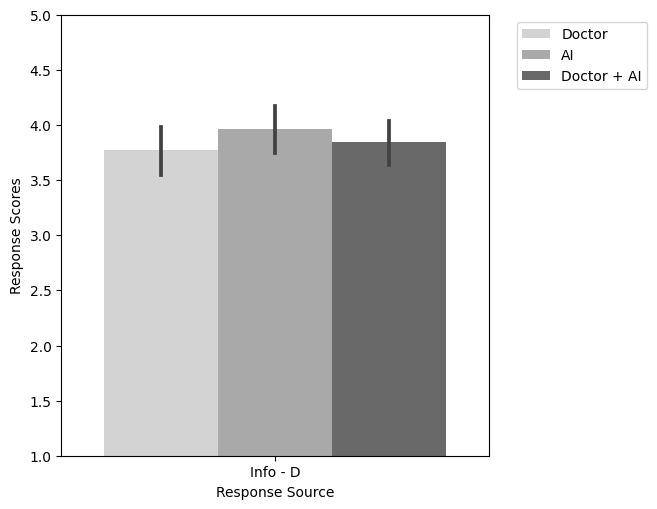

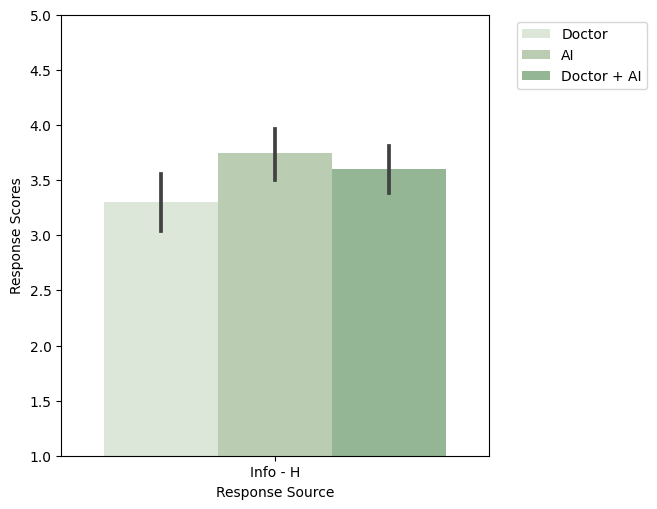

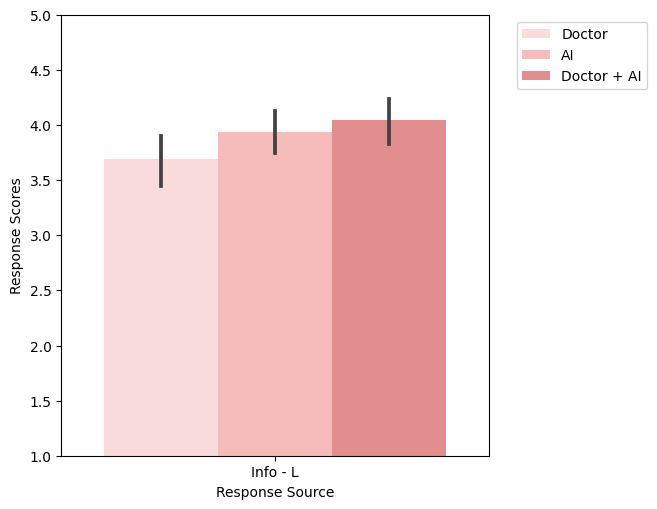

In [48]:
for ques in Question_Names_Exp_2_3:
    source_order = [' - D', ' - H', ' - L']
    ques_3_list = list(Experiment_3_data["Question Type"])
    source_3_list = list(Experiment_3_data["Response Source"])

    for j in range(len(source_order)):
        source = source_order[j]
        palette = palettes_3[j]

        temp_ds = pd.DataFrame()
        temp_ds.insert(0, "Question Type", 0)
        temp_ds.insert(1, "Response Scores", 0)
        temp_ds.insert(2, "Response Source", 0)
        temp_ds.insert(3, "Random Header", 0)

        for i in range(len(ques_3_list)):
            if ques_3_list[i] == ques:
                if source in source_3_list[i]:
                    temp_ds.loc[len(temp_ds)] = Experiment_3_data.loc[i, :].values.flatten().tolist()[1:5]
    
        if ques != "Valid":
            y_lim = [1,5]
        else:
            y_lim = [0,1]

        plot_params = {
            'x': 'Response Source',
            'y' : "Response Scores",
            'hue' : "Random Header",
            'data' : temp_ds,
            'palette': palette,
            'order' : [ques + source],
            'hue_order' : Random_Labels,
        }
        fig, ax = plt.subplots(figsize=[5,5])
        plt.tight_layout()
        snsar.barplot(ax=ax, **plot_params)
        ax.set_ylim(y_lim)
        ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c310279d-b439-442d-88c9-6cebee17bd26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>